In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import numpy as np

In [3]:

results = pd.read_csv('results_run_mcich.csv', index_col=None)
for name in ['no_block_', 'mcich_', 'degree_', 'random_']:
    results[('total_' + name)[:-1]] = sum(results[name + str(i)] for i in range(1, 4)).subtract(20) 
# sns.set()
results = results[results.seed_size == 20]
results.head()


,network_name,seed_method,threshold,seed_size,budget_total,no_block_0,no_block_1,no_block_2,no_block_3,mcich_0,...,random_2,random_3,degree_0,degree_1,degree_2,degree_3,total_no_block,total_mcich,total_degree,total_random
0,astroph,random_k_core,2,20,938.0,2959,0,0,15812,18751,...,907,13859,4405,9,4,14353,15792,0,14346,15712
1,astroph,random_k_core,2,20,1877.0,2959,0,0,15812,18751,...,1622,12185,6251,9,14,12497,15792,0,12500,15512
2,astroph,random_k_core,2,20,2815.0,2959,0,0,15812,18751,...,2352,10495,8204,7,10545,15,15792,0,10547,15110
3,astroph,random_k_core,2,20,3754.0,2959,0,0,15812,18751,...,2734,9194,18725,20,26,0,15792,0,26,14575
4,astroph,random_k_core,2,20,4692.0,2959,0,0,15812,18751,...,3071,7781,18746,19,6,0,15792,0,5,14015


In [4]:
for i in range(results.shape[0]):
    if results.iloc[i,0] == "astroph":
        results.iloc[i, 3] /= 17903
        for j in range(results.shape[1] - 4, results.shape[1]):
            results.iloc[i,j] /= 17903
    elif results.iloc[i,0] == "fb-pages-politician":
        results.iloc[i, 3] /= 5908
        for j in range(results.shape[1] - 4, results.shape[1]):
            results.iloc[i,j] /= 5908
    elif results.iloc[i,0] == "wiki":
        results.iloc[i, 3] /= 7066
        for j in range(results.shape[1] - 4, results.shape[1]):
            results.iloc[i,j] /= 7066
    elif results.iloc[i,0] == "slashdot0811":
        results.iloc[i, 3] /= 77400
        for j in range(results.shape[1] - 4, results.shape[1]):
            results.iloc[i,j] /= 77400        
    
results  

,network_name,seed_method,threshold,seed_size,budget_total,no_block_0,no_block_1,no_block_2,no_block_3,mcich_0,...,random_2,random_3,degree_0,degree_1,degree_2,degree_3,total_no_block,total_mcich,total_degree,total_random
0,astroph,random_k_core,2,0.001117,938.0,2959,0,0,15812,18751,...,907,13859,4405,9,4,14353,0.882087,0.000000,0.801318,0.877618
1,astroph,random_k_core,2,0.001117,1877.0,2959,0,0,15812,18751,...,1622,12185,6251,9,14,12497,0.882087,0.000000,0.698207,0.866447
2,astroph,random_k_core,2,0.001117,2815.0,2959,0,0,15812,18751,...,2352,10495,8204,7,10545,15,0.882087,0.000000,0.589119,0.843993
3,astroph,random_k_core,2,0.001117,3754.0,2959,0,0,15812,18751,...,2734,9194,18725,20,26,0,0.882087,0.000000,0.001452,0.814109
4,astroph,random_k_core,2,0.001117,4692.0,2959,0,0,15812,18751,...,3071,7781,18746,19,6,0,0.882087,0.000000,0.000279,0.782830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4536,slashdot0811,random_k_core,4,0.000258,23208.0,77340,10,5,5,48908,...,3,2,77340,15,5,0,0.000000,0.367339,0.000000,0.245762
4537,slashdot0811,random_k_core,4,0.000258,27076.0,77340,10,5,5,48908,...,5,0,77340,15,5,0,0.000000,0.367339,0.000000,0.000000
4538,slashdot0811,random_k_core,4,0.000258,30944.0,77340,10,5,5,48908,...,1,4,77340,15,5,0,0.000000,0.367339,0.000000,0.203669
4539,slashdot0811,random_k_core,4,0.000258,34812.0,77340,10,5,5,48908,...,1,4,77340,15,5,0,0.000000,0.367339,0.000000,0.190891


In [10]:
# split = results.groupby(['network_name', 'threshold', 'budget_total']).mean()
# # split.iloc[:, -1]
# for group in split:
# #     print(name)
#     if 'total' in group:
#         print(
#             averaged[group].tolist()
#              )
# threshold = results[(results.threshold == 4) & (results.network_name == 'astroph')]
# threshold

(array([769., 194., 232.,  72.,  72.,  72.,   0.,  72.,  72.,  72.,  72.,
         72.]),
 array([1.20000000e+01, 3.23433333e+03, 6.45666667e+03, 9.67900000e+03,
        1.29013333e+04, 1.61236667e+04, 1.93460000e+04, 2.25683333e+04,
        2.57906667e+04, 2.90130000e+04, 3.22353333e+04, 3.54576667e+04,
        3.86800000e+04]),
 <BarContainer object of 12 artists>)

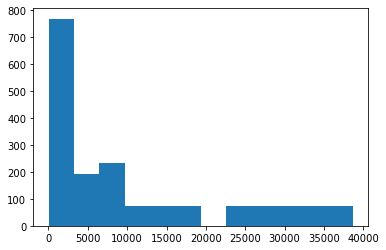

In [17]:
# pd.set_option("display.max_rows", None, "display.max_columns", None)
# # results[(results.network_name == "wiki") & (results.threshold == 2)].groupby('budget_total').max()
results['gamma'] = results['total_mcich_'] / results['total_degree_']
high_vals = results[results.gamma > 1]
plt.hist(high_vals['budget_total'], bins=12)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
d:\pycharmprojects\venv\lib\site-packages\numpy\core\_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
d:\pycharmprojects\venv\lib\site-packages\numpy\core\_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
d:\pycharmprojects\venv\lib\site-packages\numpy\core\_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


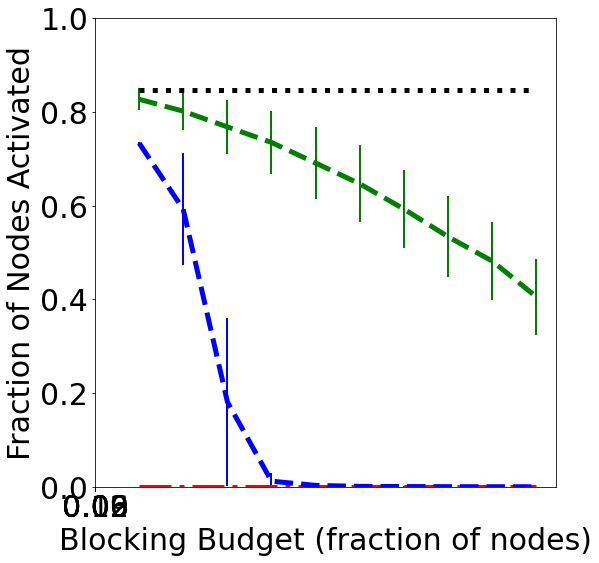

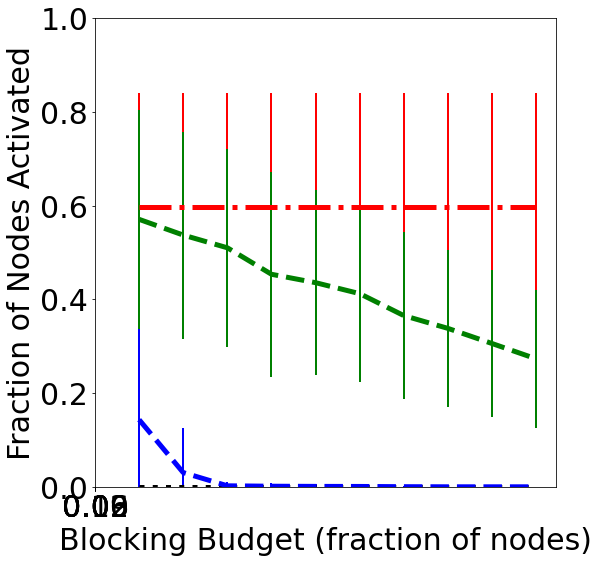

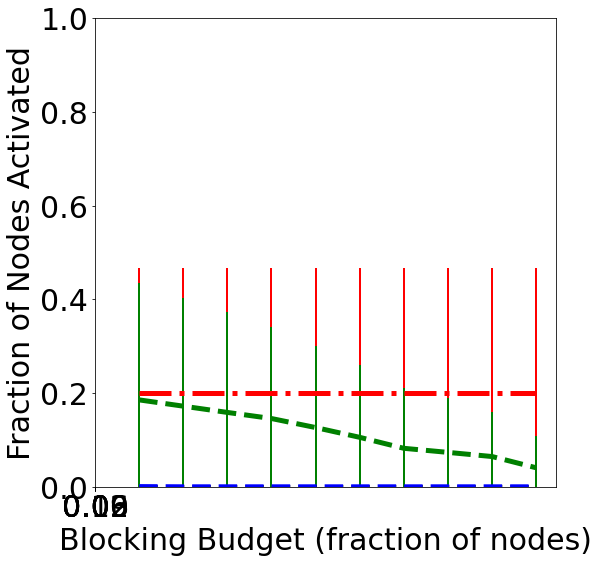

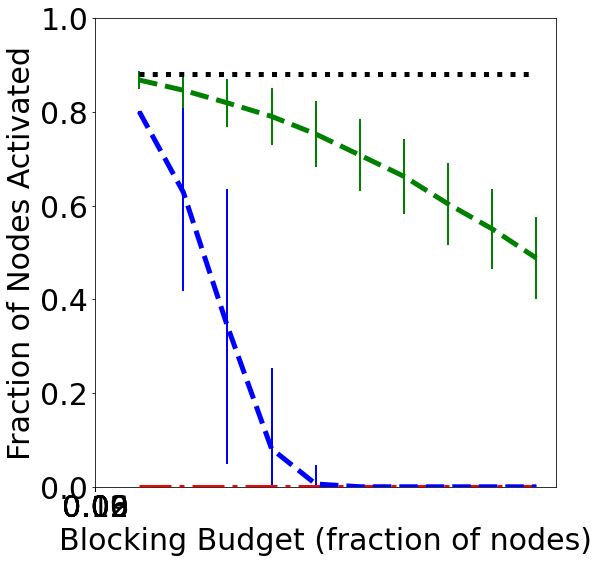

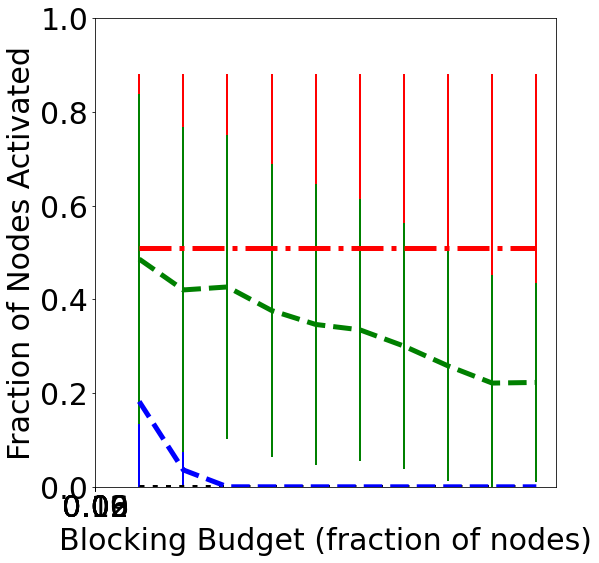

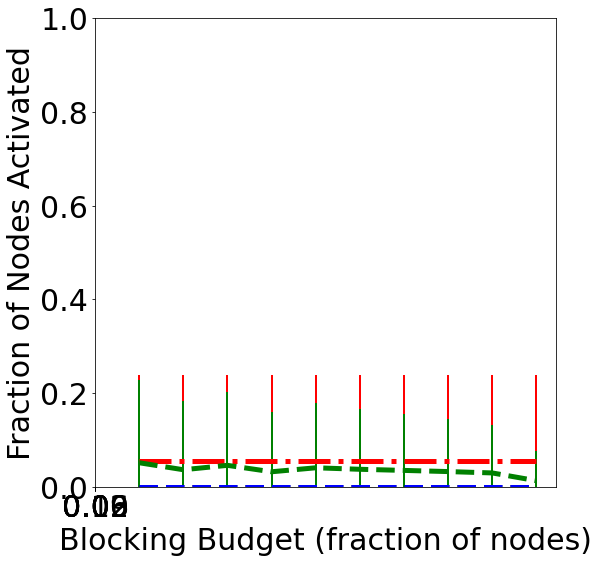

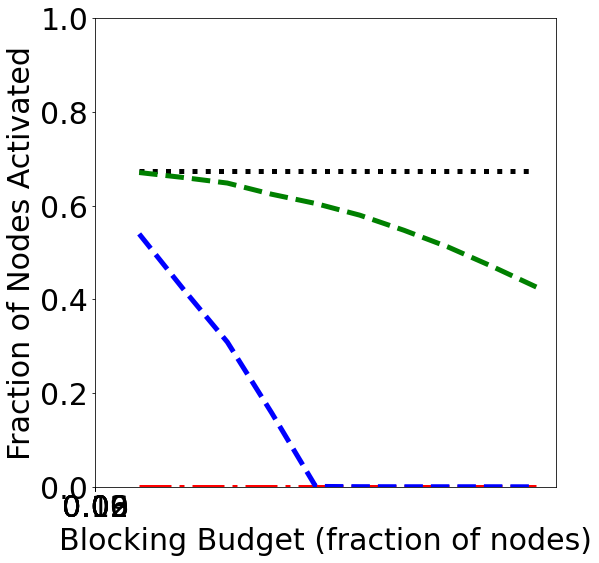

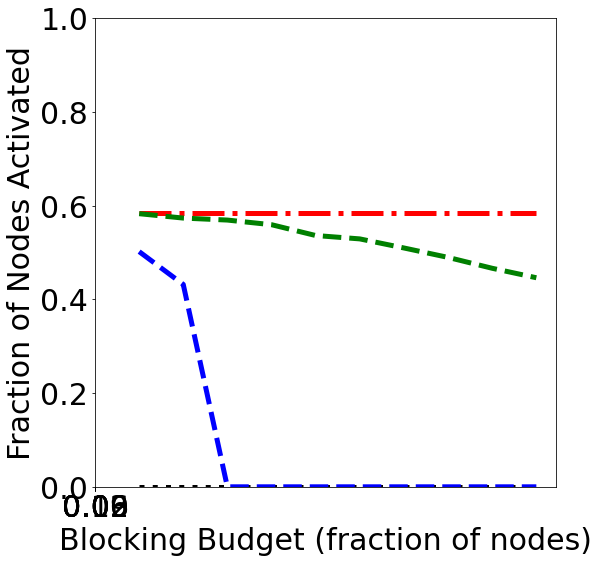

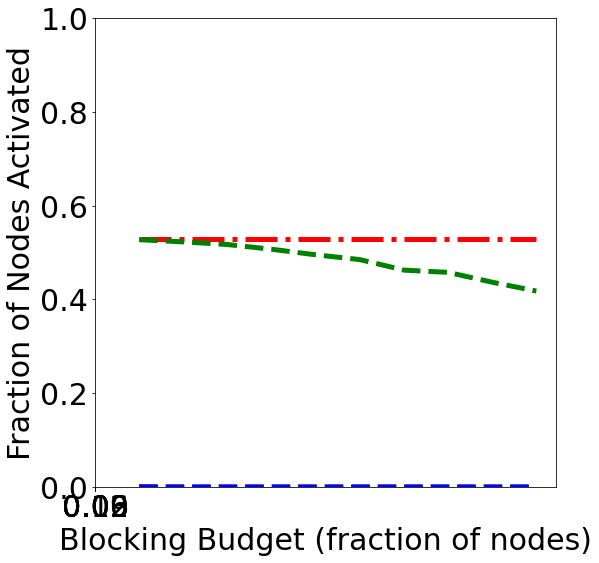

In [5]:


names = ['fb-pages-politician','astroph', 'wiki']
thres = [2, 3, 4]

font = {'family' : 'normal',
        'size'   : 30}
fontP = FontProperties(size=16)
plt.rc('font', **font)

for name in names:
    net_results = results[results.network_name == name]
#        threshold = threshold[threshold.seed_size == 10]
    for i in range(len(thres)):
        threshold = net_results[net_results.threshold == thres[i]]
        split = threshold.groupby(['budget_total']).mean()
        std = threshold.groupby(['budget_total']).std()
        fig, ax = plt.subplots(figsize=(8, 8))
        budgets = threshold['budget_total'].unique().tolist()
        total_cbh = split['total_mcich'].tolist()
        total_degree = split['total_degree'].tolist()
        total_no_block = split['total_no_block'].tolist()
        total_random = split['total_random'].tolist()
        
        
    

        
        ax.errorbar(x=budgets, y=total_cbh, yerr=std['total_mcich'], fmt='r-.', linewidth=5, elinewidth=2)
        ax.errorbar(budgets, total_degree, yerr=std['total_degree'], fmt='b--', linewidth=5, elinewidth=2)
        no_block, = ax.plot(budgets, total_no_block, 'k:', linewidth=5)
        ax.errorbar(budgets, total_random, yerr=std['total_random'], fmt='g--', linewidth=5, elinewidth=2)     
        ax.set_xticks(np.arange(0, .13, .03))
        ax.set_yticks(np.arange(0, 1.1, .2))
        fig.tight_layout(pad=1)
#         fig.legend([cbh, degree, no_block, random], ['MCICH', "High Degree", "No Blocking", "Random"], bbox_to_anchor=(1.05, 1),   borderaxespad= 1, loc='center right', prop=fontP)
#         ax.set_title(name + " Fraction Infected", pad=2)
#         if name == 'fb-pages-politician':
#             ax.set_title("fb-poli Fraction Infected", pad=2)
        ax.set_xlabel("Blocking Budget (fraction of nodes)")
        ax.set_ylabel("Fraction of Nodes Activated")
        plt.ylim(0)
#         ax.yaxis.set_ticks_position("right")
#         ax.yaxis.set_label_position("right")
        plt.savefig("plots/" + name + "_thres_" + str(thres[i]) + "_new.pdf", bbox_inches="tight")

In [5]:
saved_per_blocking = (results['total_no_block'] - results['total_cbh']) / results['budget_total']
saved_per_blocking
np.mean(saved_per_blocking)

13.922145795312721

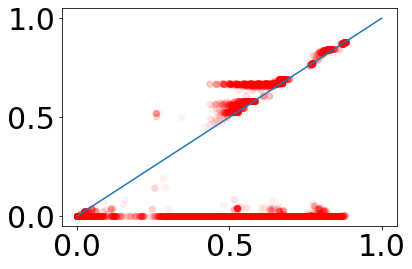

In [29]:
fig,ax = plt.subplots()
ax.scatter(results['total_degree'], results['total_cbh'], c='r', alpha=.05)
ax.plot(np.linspace(0, 1), np.linspace(0, 1))

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


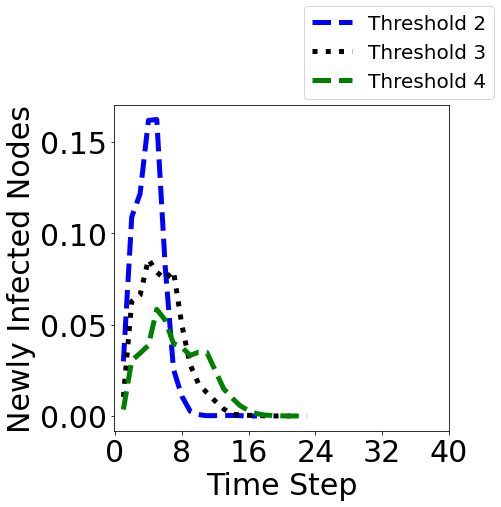

In [8]:
fig, ax = plt.subplots(figsize=(6, 6))
method_name = epi_info['blocking'].unique()
fontP = FontProperties(size=20)
plots = []
symbols = ['r-.', 'b--', 'k:', 'g--']
method = "no_block"
for threshold in [2,3,4]:
#     method = method_name[i]
    sub_epi = epi_info[(epi_info.blocking == method) & (epi_info.threshold == threshold)]
    avg = sub_epi[['time', 'newly_infected']].groupby('time').mean()['newly_infected']
    avg /= 7066
    times = sub_epi['time'].unique()
    cumsum = avg.cumsum()
    missing_time = np.setdiff1d(epi_info.time.unique(),times)
    saturation_point = cumsum.max()
    saturation = pd.Series([saturation_point for time in missing_time])
    filled_in_times = np.append(times, missing_time)
    cumsum = pd.concat([cumsum, saturation])
    plot, = ax.plot(times, avg, symbols[threshold - 1], linewidth=5)
    plots.append(plot)
ax.set_xticks(np.arange(0, epi_info.time.max()+ 1, 8))
# ax.set_yticks(np.arange(0, avg.max()+ 1, avg.max() // 5))
ax.set_xlabel('Time Step')
ax.set_ylabel("Newly Infected Nodes")
# ax.set_title("Epidemic Curves")
fig.legend(plots, ['Threshold ' + str(i) for i in [2,3,4]], bbox_to_anchor=(1.05, 1),   borderaxespad= 1, loc='center right', prop=fontP)
plt.savefig("plots/epi_curve_no_block.pdf", bbox_inches="tight")

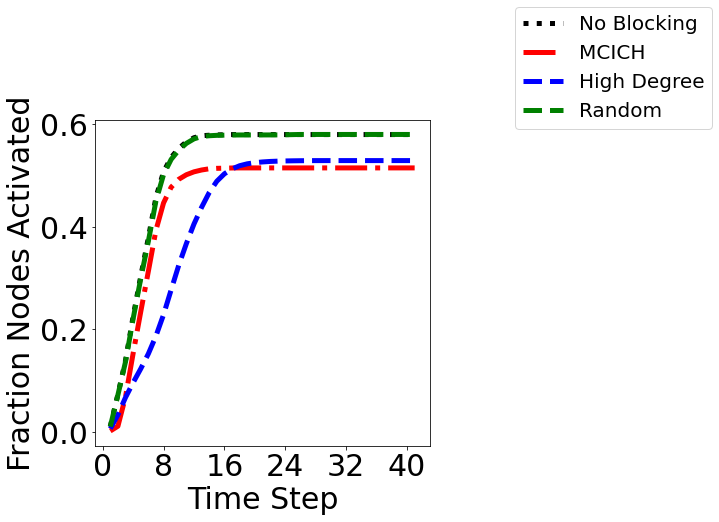

In [10]:
fig2, ax2 = plt.subplots(figsize=(6, 6))
# method_name = epi_info['blocking'].unique()
plots = []
plots2 = []
symbols = ['k:', 'r-.','b--',  'g--']
labels = [ "No Blocking", 'MCICH', "High Degree", "Random"]
method_name = ['no_block', 'mcich', 'degree', 'random']
for i in range(len(method_name)):
    method = method_name[i]
    sub_epi = epi_info[(epi_info.blocking == method) & (epi_info.threshold == 3)]
    avg = sub_epi[['time', 'newly_infected']].groupby('time').mean()['newly_infected']
    avg /= 7066
    times = sub_epi['time'].unique()
    cumsum = avg.cumsum()
    missing_time = np.setdiff1d(epi_info.time.unique(),times)
    saturation_point = cumsum.max()
    saturation = pd.Series([saturation_point for time in missing_time])
    filled_in_times = np.append(times, missing_time)
    cumsum = pd.concat([cumsum, saturation])
    plot2, = ax2.plot(filled_in_times, cumsum, symbols[i], linewidth=5)
    plots2.append(plot2)
ax2.set_xticks(np.arange(0, epi_info.time.max()+ 1, 8))
# ax.set_yticks(np.arange(0, avg.max()+ 1, avg.max() // 5))
ax2.set_xlabel("Time Step")
ax2.set_ylabel("Fraction Nodes Activated")
# ax2.set_title("Cumulative Infected")
fig2.legend(plots2, labels, bbox_to_anchor=(1.05, 1),   borderaxespad= 1, loc='center left', prop=fontP)
plt.savefig("plots/cum_curve_blocking.pdf", bbox_inches="tight")

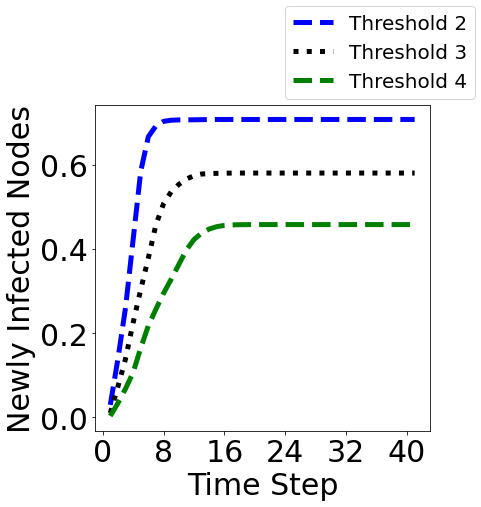

In [76]:
fig, ax = plt.subplots(figsize=(6, 6))
method_name = epi_info['blocking'].unique()
fontP = FontProperties(size=20)
plots = []
symbols = ['r-.', 'b--', 'k:', 'g--']
method = "no_block"
for threshold in [2,3,4]:
#     method = method_name[i]
    sub_epi = epi_info[(epi_info.blocking == method) & (epi_info.threshold == threshold)]
    avg = sub_epi[['time', 'newly_infected']].groupby('time').mean()['newly_infected']
    avg /= 7066
    times = sub_epi['time'].unique()
    cumsum = avg.cumsum()
    missing_time = np.setdiff1d(epi_info.time.unique(),times)
    saturation_point = cumsum.max()
    saturation = pd.Series([saturation_point for time in missing_time])
    filled_in_times = np.append(times, missing_time)
    cumsum = pd.concat([cumsum, saturation])
    plot, = ax.plot(filled_in_times, cumsum, symbols[threshold - 1], linewidth=5)
    plots.append(plot)
ax.set_xticks(np.arange(0, epi_info.time.max()+ 1, 8))
# ax.set_yticks(np.arange(0, avg.max()+ 1, avg.max() // 5))
ax.set_xlabel('Time Step')
ax.set_ylabel("Newly Infected Nodes")
# ax.set_title("Epidemic Curves")
fig.legend(plots, ['Threshold ' + str(i) for i in [2,3,4]], bbox_to_anchor=(1.05, 1),   borderaxespad= 1, loc='center right', prop=fontP)
plt.savefig("plots/cum_curve_no_block.pdf", bbox_inches="tight")

In [15]:
results[(results.network_name == 'astroph') & (results.threshold == 4)][['total_no_block']]

,total_no_block
143,0.064552
144,0.064552
145,0.064552
146,0.064552
147,0.064552
148,0.064552
149,0.064552
150,0.064552
151,0.064552
152,0.064552
